# 关于人工智能竞赛的介绍

<br><br>
人工智能领域的竞赛的主办方一般是学术界（比如大学）或者公司。比较知名的有ImageNet,COCO等。<br><br>

斯坦福的李飞飞在2010年左右开始举办ImageNet的竞赛， 一直到2018年。ImageNet数据集包括了超过1000万张已经标注好的图片。我们熟知的2012年的AlexNet，2016年的RestNet，2018年的DenseNet，就是ImageNet比赛推出的知名的计算机视觉深度学习网络，可以说这个比赛推动了整个计算机视觉深度学习领域的发展。
<br><br>
在目标检测领域有一个很知名的COCO数据集， Coco其实就是Microsoft举办的一个比赛里面推出来的一部分的数据集，他们花费了大量的人力物力去采集数据集，举办比赛目的是希望通过一些模型的突破来推动人工智能领域的影响力。 
<br><br><br>
**参加比赛的好处：**

<ol>
    <li>收获成长与经验</li>
  <li>获得荣誉（奖牌）和奖金</li>
  <li>有些人甚至还将这些实质性的经验变成自己的SCI论文。</li></ol> 
  <br>

**知名的竞赛平台**
<br><br>

**kaggle**：世界级的最知名的竞赛平台。<br>

**天池**：主要是针对国内的竞赛平台，由阿里云举办。
<br><br>

# House Prices: Advanced Regression Techniques
### Predict sales prices with detailed feature engineering, automatic outlier detection, Advanced Regression Techniques(GradientBoosting,Xgboost...) and Stacking
![main](http://rasbt.github.io/mlxtend/user_guide/classifier/StackingCVClassifier_files/stacking_cv_algorithm.png)

其中T是基学习器的个数。
Step1 仅仅是为Step2准备训练数据(使用了交叉验证)，所以Step3需要重新训练
<br>

**Competition Description**

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

**Summary**
- 1.Exploratory Data Analysis (EDA):distribution,outliers...
- 2.Personalized Feature Engineering
- 3.Advanced Regression Techniques
- 4.Ensemble Learning



<br>

### 加载包
<br>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
import numpy as np  
import pandas as pd 
from datetime import datetime
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, Ridge 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import make_scorer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LinearRegression
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

## 1.Exploratory Data Analysis (EDA，探索性数据分析)
### 了解数据的分布：特征工程的基础
* 建议多用describe函数观察特征、target的分布情况
* 画出协方差矩阵、散点图、直方图等

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

train.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

train和test分别是训练集和测试集，分别有 1460 个样本，80 个特征。

每个特征的含义在./data/data_description.txt中有说明

In [3]:
print("Train set size:", train.shape)
print("Test set size:", test.shape)

Train set size: (1460, 81)
Test set size: (1460, 80)


SalePrice列代表房价，是我们要预测的。

因为我们任务是预测房价，所以在数据集中核心要关注的就是房价（SalePrice) 一列的取值分布。

### 1.1 房价分布

In [4]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

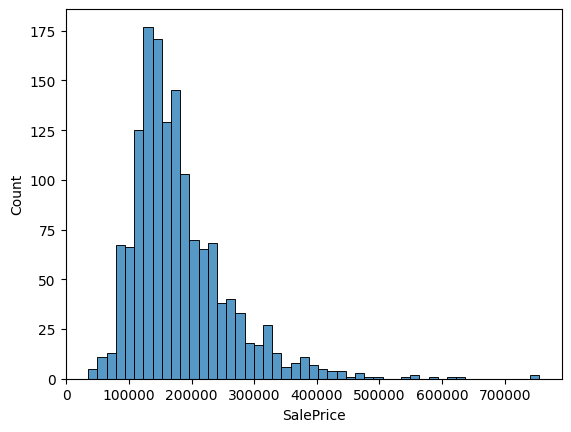

In [5]:
sns.histplot(train['SalePrice']);

房价取值分布

从图上可以看出，SalePrice列峰值比较陡，并且峰值向左偏。

也可以直接调用skew()和kurt()函数计算SalePrice具体的偏度和峰度值。

对于偏度和峰度都比较大的情况，建议对SalePrice列取log()进行平滑。

In [6]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [7]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#much better
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 0.121347
Kurtosis: 0.809519


# 补充知识：偏度和峰度

<br><br>
**偏度（Skewness）**可以用来度量随机变量概率分布的不对称性。<br>

偏度的取值范围为(-∞,+∞)<br>

当偏度<0时，概率分布图左偏(如下左图)。<br>

当偏度>0时，概率分布图右偏(如下右图)。<br>

正态分布的偏度为0。

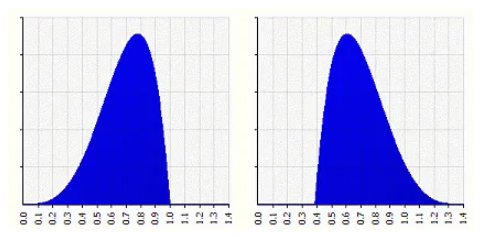

<br><br><br>

**峰度（Kurtosis）**可以用来度量随机变量概率分布的陡峭程度。

峰度的取值范围为[1,+∞)，标准正态分布的峰度值为 3，峰度值越大，概率分布图越高尖，峰度值越小，越矮胖。

下图中左图是标准正态分布，峰度=3，右图的峰度=4，可以看到右图比左图更高尖。

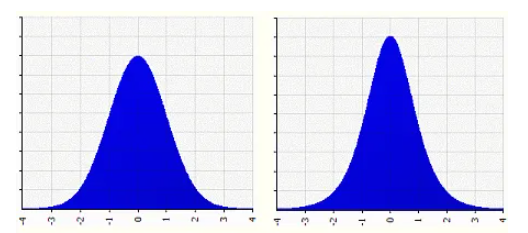

<br><br>

很多数据分析的算法都是基于数据的分布是类似于正态分布的，数据都是在均值的周围分布。如果Skewness的绝对值过大，须对其进行纠偏才能使用，否则该指标的价值将大打折扣。<br>

纠偏，其实就是通过各种数学转换，使得变量的分布呈现或者近似正态分布，模型的拟合常常会有明显的提升。<br>

常用的数学变换方法有：对数变换、幂变换（例如开根号、平方等）、rank变换、倒数变换、指数变换等，注意在进行对数或幂变换时要保证结果不出现负数。

### 1.2 特征与目标(房价)的相关性分析

了解完SalePrice的分布后，我们可以计算 80 个特征与SalePrice的相关关系。

重点关注与SalePrice相关性最强的 10 个特征。

In [8]:
corrmat = train.corr(numeric_only=True)
# 取 top10
k = 10
re_cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
train[re_cols]

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0     12.247699            7       1710           2         548          856   
1     12.109016            6       1262           2         460         1262   
2     12.317171            7       1786           2         608          920   
3     11.849405            7       1717           3         642          756   
4     12.429220            8       2198           3         836         1145   
...         ...          ...        ...         ...         ...          ...   
1455  12.072547            6       1647           2         460          953   
1456  12.254868            6       2073           2         500         1542   
1457  12.493133            7       2340           1         252         1152   
1458  11.864469            5       1078           1         240         1078   
1459  11.901590            5       1256           1         276         1256   

      1stFlrSF  FullBath  YearBuilt  YearRemodAdd  
0          856         2       2003          2003  
1         1262         2       1976          1976  
2          920         2       2001          2002  
3          961         1       1915          1970  
4         1145         2       2000          2000  
...        ...       ...        ...           ...  
1455       953         2       1999          2000  
1456      2073         2       1978          1988  
1457      1188         2       1941          2006  
1458      1078         1       1950          1996  
1459      1256         1       1965          1965  

[1460 rows x 10 columns]

In [9]:
np.corrcoef(train[re_cols].values.T)

array([[1.        , 0.81718461, 0.70092699, 0.68062487, 0.65088768,
        0.61213423, 0.59698132, 0.59477066, 0.58657019, 0.56560778],
       [0.81718461, 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.57232277, 0.55068392],
       [0.70092699, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.19900971, 0.28738852],
       [0.68062487, 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.53785009, 0.42062215],
       [0.65088768, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.47895382, 0.37159981],
       [0.61213423, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.391452  , 0.29106558],
       [0.59698132, 0.47622383, 0.56602397, 0.43931681, 0.48978165,
        0.81952998, 1.        , 0.38063749, 0.28198586, 0.24037927],
       [0.59477066, 0.55059971, 0.6300116

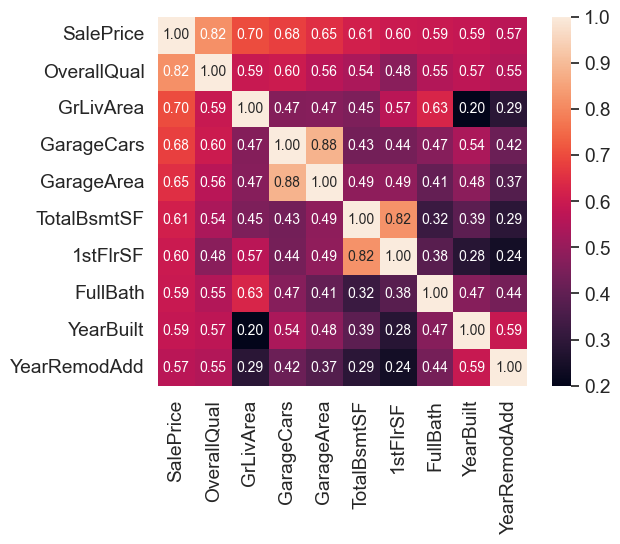

In [10]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### 从图中可以看出：

* OverallQual，GrLivArea 以及 TotalBsmtSF  与 SalePrice 有很强的相关性。
* GarageCars 和 GarageArea 也是相关性比较强的变量. 车库中存储的车的数量是由车库的面积决定的，它们就像双胞胎，所以不需要专门区分 GarageCars 和 GarageAre，所以我们只需要其中的一个变量。这里我们选择了 GarageCars，因为它与 SalePrice 的相关性更高一些。
* TotalBsmtSF  和 1stFloor 与上述情况相同，我们选择 TotalBsmtS 。
* FullBath 几乎不需要考虑。
* TotRmsAbvGrd 和 GrLivArea 也是变量中的双胞胎。
* YearBuilt 和 SalePrice 相关性似乎不强。

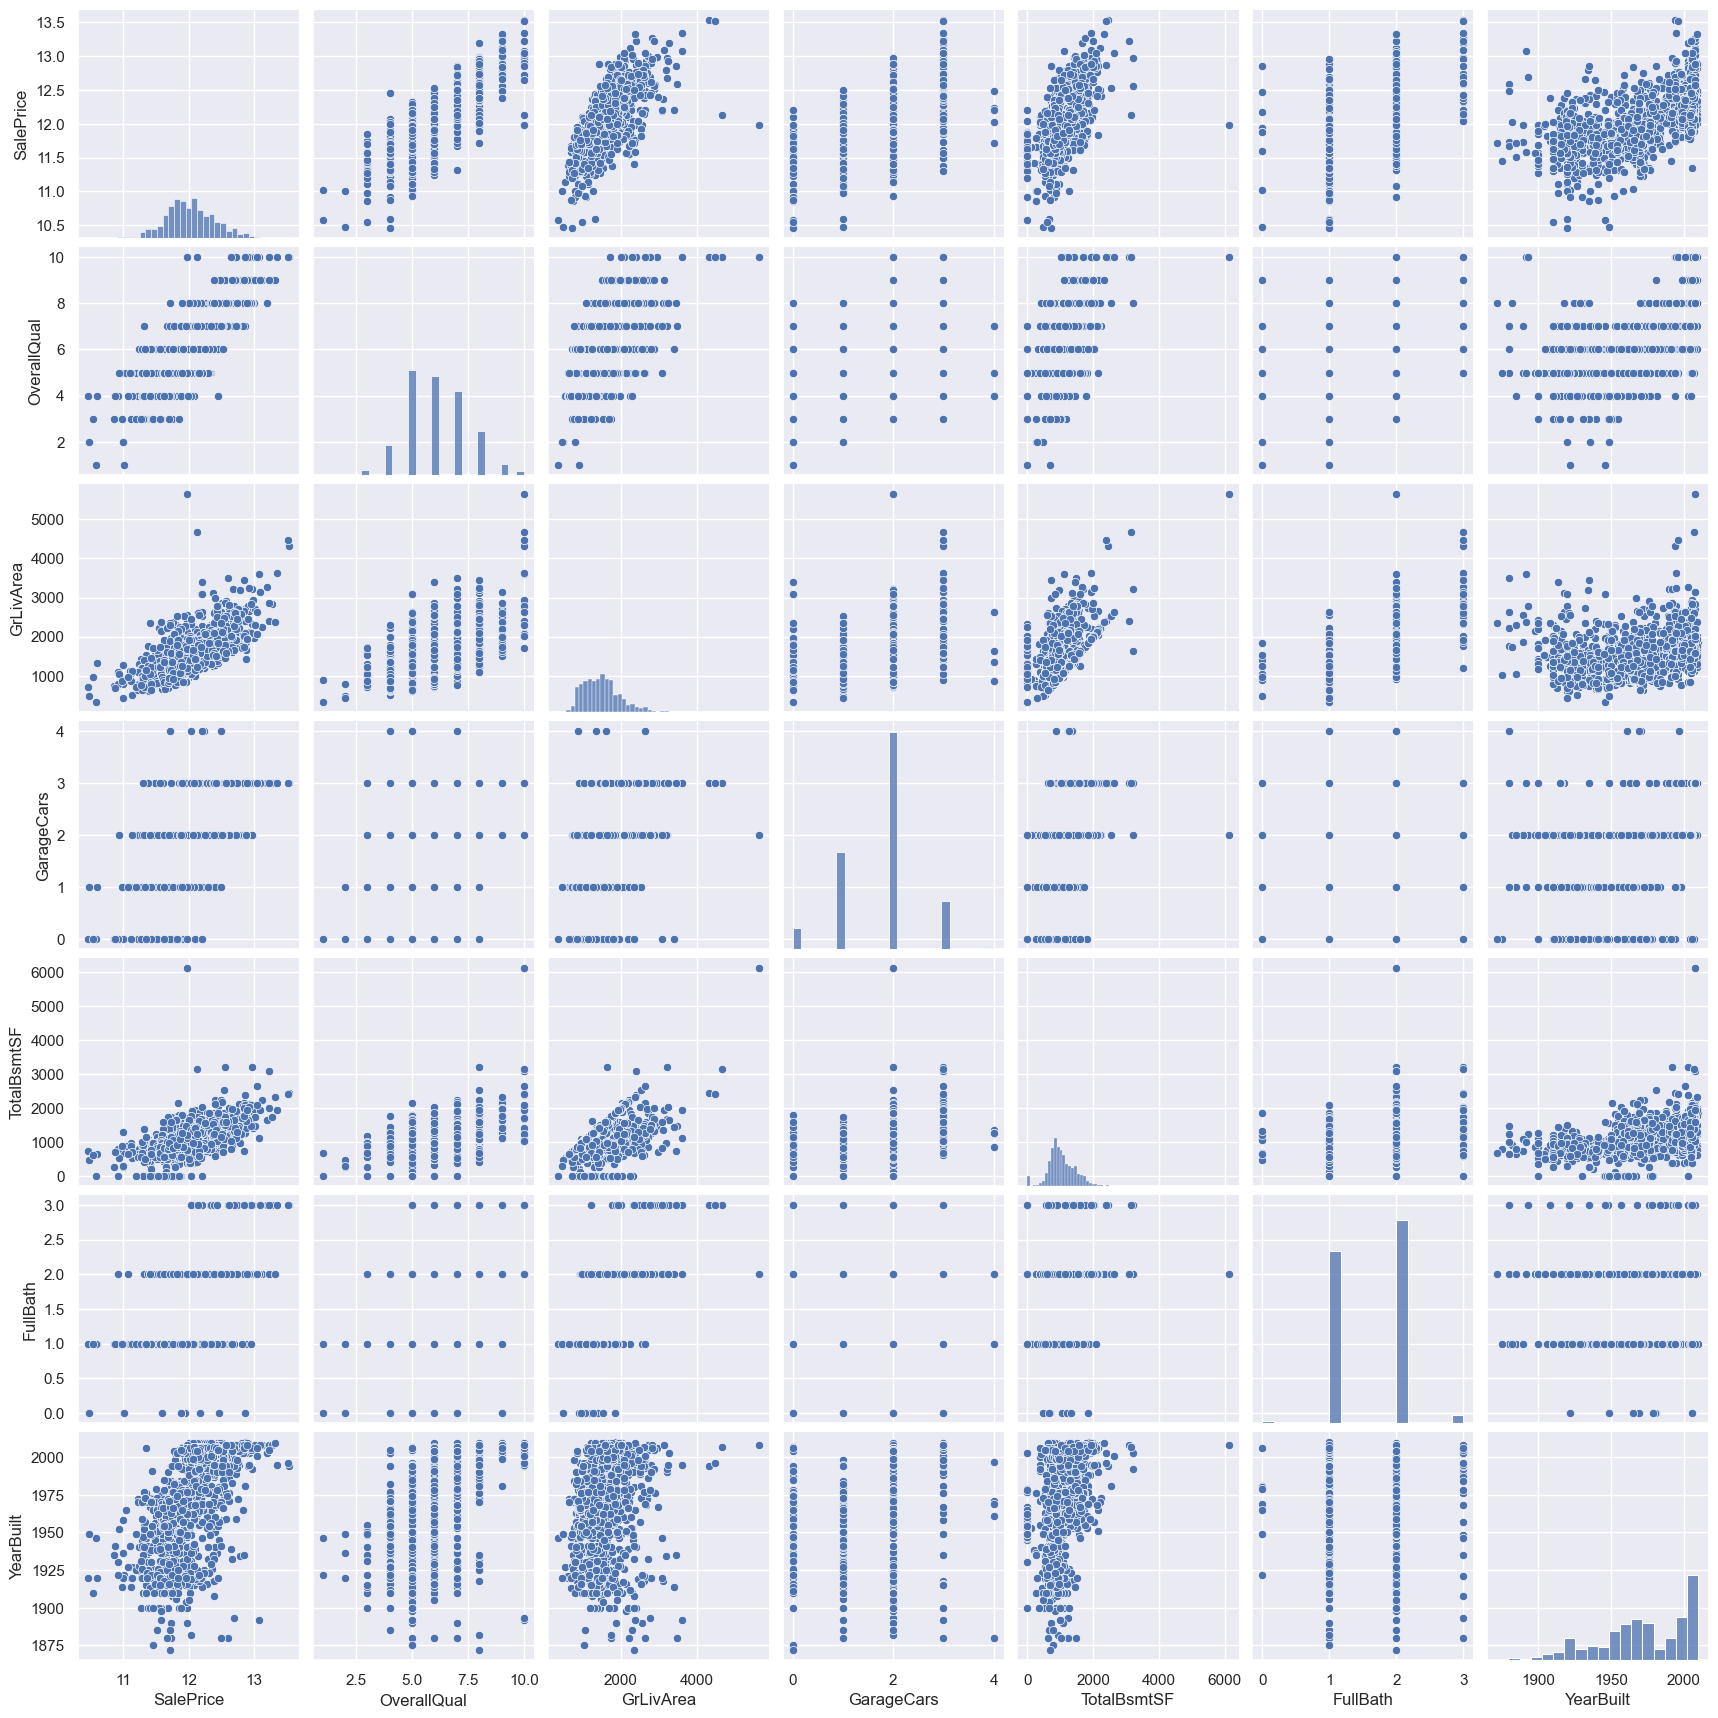

In [11]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], height = 2.5)
plt.show()

### 1.3 剔除离群样本

由于数据集样本量很少，离群点不利于我们后面训练模型。

所以需要计算每个**数值型特征**的离群点，剔除掉离群次数最多的样本。

In [12]:
def detect_outliers(x, y, top=5, plot=True):
    lof = LocalOutlierFactor(n_neighbors=40, contamination=0.1)#contamination是样本中异常点的比例
    x_ =np.array(x).reshape(-1,1)
    preds = lof.fit_predict(x_)
    lof_scr = lof.negative_outlier_factor_
    out_idx = pd.Series(lof_scr).sort_values()[:top].index
    if plot:
        f, ax = plt.subplots(figsize=(9, 6))
        plt.scatter(x=x, y=y, c=np.exp(lof_scr), cmap='RdBu')#c是颜色，cmap是配合c来使用的，此时c不是颜色值，而是一个序列，cmap将c转换成相应的颜色值
    return out_idx

detect_outliers()是自定义函数，用sklearn库的LocalOutlierFactor算法计算离群点。

# 补充知识：Local Outlier Factor（LOF）离群点检测算法


Local Outlier Factor（LOF）是基于密度的经典算法（Breuning et. al. 2000）, 文章发表于 SIGMOD 2000, 到目前已经有 3000+ 的引用。在 LOF 之前的异常检测算法大多是基于统计方法的，或者是借用了一些聚类算法用于异常点的识别（比如 ，DBSCAN，OPTICS）。但是，基于统计的异常检测算法通常需要假设数据服从特定的概率分布，这个假设往往是不成立的。而聚类的方法通常只能给出 0/1 的判断（即：是不是异常点），不能量化每个数据点的异常程度。相比较而言，基于密度的LOF算法要更简单、直观。它不需要对数据的分布做太多要求，还能量化每个数据点的异常程度（outlierness）。
<br><br>

LOF 是基于密度的算法，其最核心的部分是关于数据点密度的刻画。如果对 distanced-based 或者 density-based 的聚类算法有些印象，你会发现 LOF 中用来定义密度的一些概念似曾相识。了解了这些核心概念，整个算法也就显而易见了。而整个算法，最主要的是下面四个概念：


**1. K-邻近距离（k-distance）：**

在距离数据点 p 最近的k个点中，第 k 个最近的点跟点 p 之间的距离称为点 p 的 K-邻近距离，记为 k-distance (p) 。
<br>

**2. 可达距离（reachable distance）：**
可达距离的定义跟K-邻近距离是相关的，给定参数k时， 数据点 p 到 数据点 o 的可达距离 reach-dist（p, o）为数据点 o 的K-邻近距离 和 数据点p与点o之间的直接距离的最大值。即：

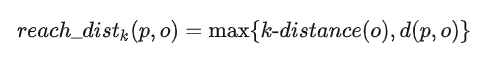

<br>

**3. 局部可达密度（local reachable density）：**

局部可达密度的定义是基于可达距离的，对于数据点 p，那些跟点p的距离小于等于 k-distance（p）的数据点称为它的 k-nearest-neighbor，记为 N_k(p)，数据点 p 的局部可达密度为它与邻近的数据点的平均可达距离的倒数，即：


<br>

**4. 局部异常因子（local outlier factor）：**

根据局部可达密度的定义，如果一个数据点跟其他点比较疏远的话，那么显然它的局部可达密度就小。但LOF算法衡量一个数据点的异常程度，并不是看它的绝对局部密度，而是看它跟周围邻近的数据点的相对密度。这样做的好处是可以允许数据分布不均匀、密度不同的情况。局部异常因子即是用局部相对密度来定义的。数据点 p 的局部相对密度（局部异常因子）为点p的邻居们的平均局部可达密度跟数据点p的局部可达密度的比值，即：



根据局部异常因子的定义，如果数据点 p 的 LOF 得分在1附近，表明数据点p的局部密度跟它的邻居们差不多；如果数据点 p 的 LOF 得分小于1，表明数据点p处在一个相对密集的区域，不像是一个异常点；如果数据点 p 的 LOF 得分远大于1，表明数据点p跟其他点比较疏远，很有可能是一个异常点。下面这个图展示了一个二维的例子。上面的数字标明了相应点的LOF得分，可以让人对LOF有一个直观的印象。

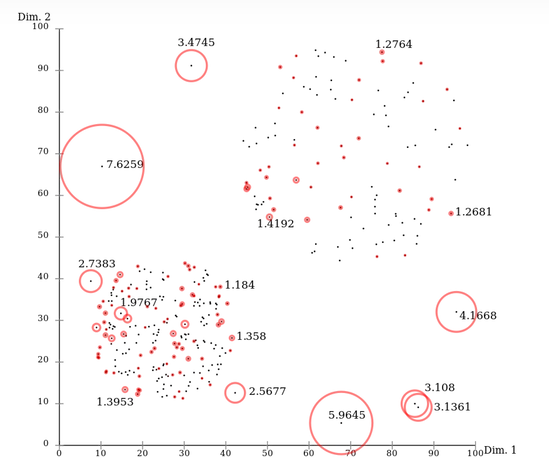

了解了 LOF 的定义，整个算法也就显而易见了：

1. 对于每个数据点，计算它与其它所有点的距离，并按从近到远排序；

2. 对于每个数据点，找到它的k邻域点，计算 LOF 得分。

3. 如果LOF值越大，说明越异常，反之越小，说明越正常。

-------------------------
-------------------------
补充知识结束，以下继续正题

Index([1298, 523, 1182, 691, 533], dtype='int64')

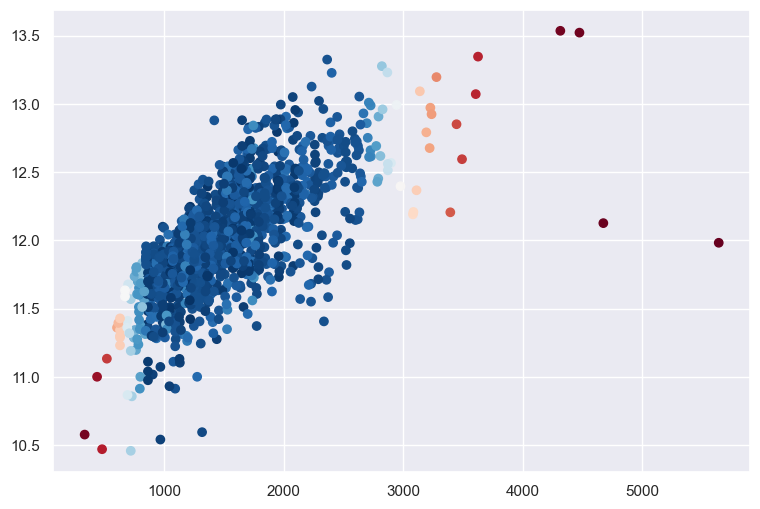

In [13]:
outs = detect_outliers(train['GrLivArea'], train['SalePrice'],top=5) #got 1298,523
outs

In [14]:
#直接调用LocalOutlierFactor看一下特征GrLivArea的离群点的排名
lof = LocalOutlierFactor(n_neighbors=40, contamination=0.1)
x_ = np.array(train['GrLivArea']).reshape(-1, 1)
lof.fit_predict(x_)
lof_scr = lof.negative_outlier_factor_
pd.Series(lof_scr).sort_values()

array([1, 1, 1, ..., 1, 1, 1])

1298   -8.974362
523    -5.968408
1182   -5.366630
691    -4.899521
533    -4.811926
          ...   
1404   -0.955454
136    -0.955454
483    -0.954824
575    -0.954824
339    -0.951051
Length: 1460, dtype: float64

Index([185, 170, 635, 1009, 88], dtype='int64')

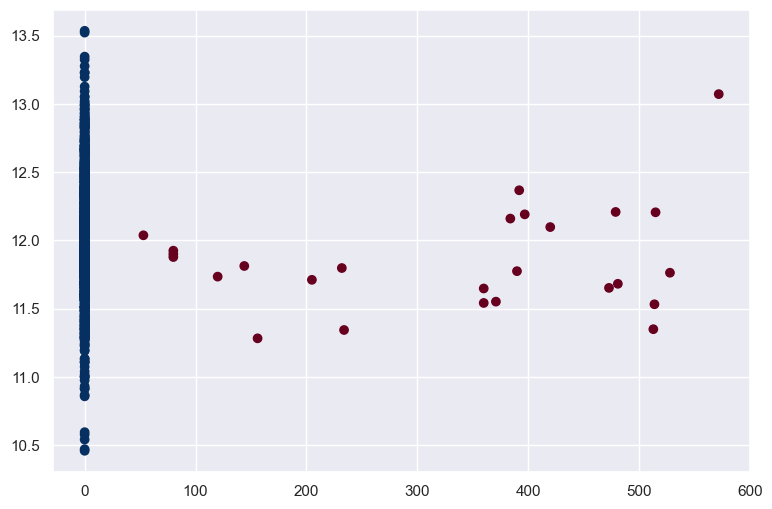

In [15]:
outs = detect_outliers(train['LowQualFinSF'], train['SalePrice'],top=5)#got 88
outs

In [16]:
#很多public kernel中都用这些点，88,523,1298很容易找到，对于其他的outliers后面会补充说明
#改进点８：more or less outliers
# outliers = [30, 88, 462, 523, 632, 1298, 1324]

In [17]:
#all_outliers只包含30,88,523,1298，其他的outliers是怎么得到的？
#可能的原因：
#1.detect_outliers函数中的参数设置问题
#2.这里仅从特征与train['SalePrice']的关系来寻找outliers,或许也可以从特征与特征之间的关系来寻找outliers
from collections import Counter
all_outliers=[]
numeric_features = train.dtypes[train.dtypes != 'object'].index
for feature in numeric_features:
    try:
        outs = detect_outliers(train[feature], train['SalePrice'],top=5, plot=False)
    except:
        continue
    all_outliers.extend(outs)

print(Counter(all_outliers).most_common())
# for i in outliers:
#     if i in all_outliers:
#         print(i)

[(0, 4), (533, 4), (1298, 4), (1270, 3), (375, 3), (523, 3), (635, 3), (634, 3), (976, 3), (975, 3), (978, 3), (977, 3), (313, 2), (335, 2), (916, 2), (1213, 2), (1437, 2), (77, 2), (7, 2), (953, 2), (496, 2), (1182, 2), (954, 2), (597, 2), (1163, 2), (1350, 2), (1328, 2), (495, 2), (1459, 1), (1, 1), (1458, 1), (1457, 1), (164, 1), (873, 1), (589, 1), (555, 1), (249, 1), (706, 1), (451, 1), (636, 1), (1100, 1), (304, 1), (508, 1), (218, 1), (1166, 1), (453, 1), (178, 1), (803, 1), (1140, 1), (771, 1), (277, 1), (1223, 1), (827, 1), (699, 1), (219, 1), (229, 1), (790, 1), (930, 1), (1028, 1), (695, 1), (645, 1), (1149, 1), (125, 1), (599, 1), (574, 1), (332, 1), (440, 1), (1024, 1), (1373, 1), (431, 1), (1400, 1), (185, 1), (170, 1), (1009, 1), (88, 1), (691, 1), (738, 1), (188, 1), (326, 1), (624, 1), (298, 1), (1283, 1), (53, 1), (189, 1), (809, 1), (48, 1), (203, 1), (434, 1), (1218, 1), (642, 1), (166, 1), (309, 1), (605, 1), (1190, 1), (747, 1), (420, 1), (1340, 1), (542, 1), (137

In [18]:
outliers = [0,433,1298,1270,375,523,635,634,976,975,978,977]

In [19]:
#delete outliers
train = train.drop(train.index[outliers])
train.shape

(1448, 81)

In [20]:
train.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
1      5   2007        WD         Normal  12.109016  
2      9   2008        WD         Normal  12.317171  
3      2   2006        WD        Abnorml  11.849405  
4     12   2008        WD         Normal  12.429220  
5     10   2009        WD         Normal  11.870607  

[5 rows x 81 columns]

### 1.4 将训练集和测试集合并

到这里， EDA 就完成了。最后，将训练集和测试集合并，进行下面的特征工程。

In [21]:
#合并train,test的特征，便于统一进行特征工程
y = train.SalePrice.reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test
features = pd.concat([train_features, test_features]).reset_index(drop=True)
# Now drop the  'Id' colum since it's unnecessary for  the prediction process.
features.drop(['Id'], axis=1, inplace=True)
print(features.shape)

(2908, 79)


features合并了训练集和测试集的特征，是我们下面要处理的数据。

## 2.特征工程

In [22]:
#统计数值型和非数值型特征的数量
numeric_features = features.dtypes[features.dtypes != 'object'].index
print(numeric_features)
print(len(numeric_features)) #33
category_features = features.dtypes[features.dtypes == 'object'].index
print(category_features)
print(len(category_features)) #46

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
36
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'Cen

### 2.1 类型矫正

MSSubClass（房屋类型）、YrSold（销售年份）和MoSold（销售月份）是类别型特征，只不过用数字来表示，需要将它们转成文本特征。

In [23]:
features['MSSubClass'] = features['MSSubClass'].apply(str)
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)
# 改进点1：OverallQual，OverallCond也是由数字表示的类别变量，但内含顺序信息
# features['OverallQual'] = features['OverallQual'].astype(str)
# features['OverallCond'] = features['OverallCond'].astype(str)

### 2.2 填充特征缺失值

填充缺失值没有统一的标准，需要根据不同的特征来决定按照什么样的方式来填充。

In [24]:
# Functional：文档提供了典型值 Typ
features['Functional'] = features['Functional'].fillna('Typ') #Typ 是典型值

# 分组填充需要按照相似的特征分组，取众数或中位数
# MSZoning（房屋区域）按照 MSSubClass（房屋）类型分组填充众数
features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

#LotFrontage（到街道距离）按Neighborhood分组填充中位数
features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# 车库相关的数值型特征，空代表无，使用0填充空值。
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea'):
    features[col] = features[col].fillna(0)


### 2.3 偏度校正

跟探索SalePrice列类似，对偏度高的特征进行平滑。

In [25]:
# skew()方法，计算特征的偏度（skewness）。
numeric_features = features.dtypes[train.dtypes == 'float64'].index
skew_features = features[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)

# 取偏度大于 0.15 的特征
high_skew = skew_features[skew_features > 0.15]
skew_index = high_skew.index

# 处理高偏度特征，将其转化为正态分布，也可以使用简单的log变换
for i in skew_index:
    features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))


### 2.4 特征删除和新增

对于几乎都是缺失值，或单一取值占比高（99.94%）的特征可以直接删除。


In [26]:
features = features.drop(['Utilities', 'Street', 'PoolQC',], axis=1) 

同时，可以融合多个特征，生成新特征。

有时候模型很难学习到特征之间的关系，手动融合特征可以降低模型学习难度，提升效果。

In [27]:
# 将原施工日期和改造日期融合
features['YrBltAndRemod']=features['YearBuilt']+features['YearRemodAdd']

# 将地下室面积、1楼、2楼面积融合
features['TotalSF']=features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']


可以发现，我们融合的特征都是与SalePrice强相关的特征。

最后简化特征，对分布单调的特征（如：100个数据中有99个的数值是0.9，另1个是0.1），进行01处理。


In [28]:
features['haspool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

features['has2ndfloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

离散值处理

In [29]:
features = pd.get_dummies(features, dummy_na=True)

In [30]:
features.head(5)

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0    20.668117     9600            6            8       1976          1976   
1    18.663294    11250            7            5       2001          2002   
2    17.245416     9550            7            5       1915          1970   
3    21.308527    14260            8            5       2000          2000   
4    21.466663    14115            5            5       1993          1995   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_Oth  \
0    0.000000       978.0         0.0      284.0  ...         False   
1   17.785845       486.0         0.0      434.0  ...         False   
2    0.000000       216.0         0.0      540.0  ...         False   
3   25.433020       655.0         0.0      490.0  ...         False   
4    0.000000       732.0         0.0       64.0  ...         False   

   SaleType_WD  SaleType_nan  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0         True         False                  False                  False   
1         True         False                  False                  False   
2         True         False                   True                  False   
3         True         False                  False                  False   
4         True         False                  False                  False   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                 False                 False                  True   
1                 False                 False                  True   
2                 False                 False                 False   
3                 False                 False                  True   
4                 False                 False                  True   

   SaleCondition_Partial  SaleCondition_nan  
0                  False              False  
1                  False              False  
2                  False              False  
3                  False              False  
4                  False              False  

[5 rows x 356 columns]

### 2.6 生成最终训练数据

到这里特征工程就做完了， 我们需要从features中将训练集和测试集重新分离出来，构造最终的训练数据。

In [31]:

X  = features.iloc[:len(y), :] 
# X_sub = features.iloc[len(y):, :]

# X = np.array(X.copy())
y = np.array(y)
# X_sub = np.array(X_sub.copy())

# 3.模型训练


因为SalePrice是数值型且是连续的，所以需要训练一个回归模型。


## 3.1单一模型

首先以岭回归（Ridge） 为例，构造一个k折交叉验证模型。


In [32]:
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]

#使用RobustScaler：
#若数据中存在很大的异常值，可能会影响特征的平均值和方差，影响标准化结果。
#在此种情况下，使用中位数和四分位数间距进行缩放会更有效。
#RidgeCV是内嵌CV功能的岭回归模型，详见sklearn官网
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))


In [33]:
ridge.fit(X, y)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('ridgecv',
                 RidgeCV(alphas=[14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2,
                                 15.3, 15.4, 15.5],
                         cv=KFold(n_splits=10, random_state=42, shuffle=True)))])

岭回归模型有一个超参数alpha，而RidgeCV的参数名是alphas，代表输入一个超参数alpha数组。在拟合模型时，会从alpha数组中选择表现较好某个取值。



<br><br><br><br><br>由于现在只有一个模型，无法确定岭回归是不是最佳模型。所以我们可以找一些出场率高的模型多试试。

In [34]:
# lasso
lasso = make_pipeline(
    RobustScaler(),
    LassoCV(max_iter=10000, alphas=alphas_alt, random_state=42, cv=kfolds))

In [35]:
lasso.fit(X, y)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lassocv',
                 LassoCV(alphas=[14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2,
                                 15.3, 15.4, 15.5],
                         cv=KFold(n_splits=10, random_state=42, shuffle=True),
                         max_iter=10000, random_state=42))])

In [36]:
#svm
svr = make_pipeline(RobustScaler(), SVR(
    C=20,
    epsilon=0.008,
    gamma=0.0003,
))


In [37]:
svr.fit(X, y)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('svr', SVR(C=20, epsilon=0.008, gamma=0.0003))])

In [38]:
#GradientBoosting（展开到一阶导数）
gbr = GradientBoostingRegressor(n_estimators=3000,
                                learning_rate=0.05,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)

In [39]:
gbr.fit(X, y)

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=42)

In [40]:
#xgboost（展开到二阶导数）
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=3460,
                       max_depth=3,
                       min_child_weight=0,
                       gamma=0,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006)


In [41]:
xgboost.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=0, missing=nan, monotone_constraints=None,
             n_estimators=3460, n_jobs=None, nthread=-1, num_parallel_tree=None,
             predictor=None, ...)

In [42]:
#lightgbm
lightgbm = LGBMRegressor(
    objective='regression',
    num_leaves=4,
    learning_rate=0.01,
    n_estimators=5000,
    max_bin=200,
    bagging_fraction=0.75,
    bagging_freq=5,
    bagging_seed=7,
    feature_fraction=0.2,
    feature_fraction_seed=7,
    verbose=-1,
    #min_data_in_leaf=2,
    #min_sum_hessian_in_leaf=11
)


In [43]:
lightgbm.fit(X, y)

LGBMRegressor(bagging_fraction=0.75, bagging_freq=5, bagging_seed=7,
              feature_fraction=0.2, feature_fraction_seed=7, learning_rate=0.01,
              max_bin=200, n_estimators=5000, num_leaves=4,
              objective='regression', verbose=-1)

有了多个模型，我们可以再定义一个得分函数，对模型评分。

In [44]:
#模型评分函数
#这里的cross_val_score用于获取模型的neg_mean_squared_error，所谓neg_mean_squared_error，就是均方误差(MSE)的相反数
#cross_val_score的返回值是：Array of scores of the estimator for each run of the cross validation.
#所以本函数计算的是K折验证的mse的算术平方根的均值，值越小，则说明模型越好
def cv_score(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return rmse.mean()


# 补充知识：cross_var_score用于模型超参数的确定

cross_var_score可用于模型超参数的确定。主要参数有：
<ul><li>
estimator： 需要使用交叉验证的算法</li>
<li>X： 输入样本数据</li>
<li>y： 样本标签</li>
    <li>scoring： 交叉验证最重要的就是它的验证方式，选择不同的评价方法，会产生不同的评价结果。详细可用参数请见官网：<br>
        
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    </li></ul>



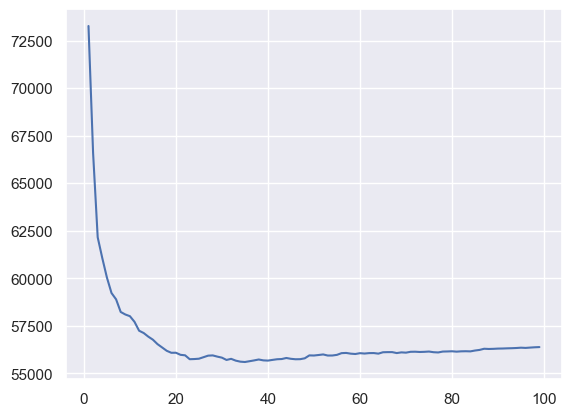

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pylab as plt
train_data = pd.read_csv("data/train.csv")
XX = pd.DataFrame(train_data["GrLivArea"].fillna(0))
yy = train_data["SalePrice"]
score = []
alphas = []
for alpha in range(1,100,1):
    alphas.append(alpha)
    rdg = KNeighborsRegressor(alpha)
    sc = np.sqrt( -cross_val_score(rdg,XX,yy,scoring = "neg_mean_squared_error", cv = 10))
    score.append(sc.mean())
plt.plot(alphas,score)
plt.show()


由上图可以看到，在alpha = 23的时候，其损失是最小的。这样便完成了选择参数的任务。

---------------------------------------------------
---------------------------------------------------

补充知识结束，继续我们的主题：<br><br>
以岭回归为例，计算模型得分。

In [46]:
score = cv_score(ridge) 
print("Ridge score: {:.4f}".format(score))

Ridge score: 0.1119


In [47]:
score = cv_score(lasso)
print("Lasso score: {:.4f}".format(score))

Lasso score: 0.3989


In [48]:
score = cv_score(svr)
print("SVR score: {:.4f}".format(score))

SVR score: 0.1782


In [49]:
score = cv_score(gbr)
print("GradientBoosting score: {:.4f}".format(score))

GradientBoosting score: 0.1146


In [ ]:
score = cv_score(xgboost)
print("XGBoost score: {:.4f}".format(score))

In [ ]:
score = cv_score(lightgbm)
print("LightGBM score: {:.4f}".format(score))

其中Ridge，GradientBoosting，XGBoost，LightGBM的损失差不多。

## 3.2 集成算法(Stacking)

In [ ]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, svr, gbr,xgboost,lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

训练stacking模型

stacking 3步走(可不用管细节，fit会完成stacking的整个流程)：<br>
1.1 learn first-level model<br>
1.2 construct a training set for second-level model<br>
2. train the second-level model:学习第2层的模型，也就是学习如何融合第1层的模型<br>
3. re-learn first-level model on the entire train set<br>



In [ ]:
print('START Fit:',datetime.now(), 'StackingCVRegressor')
stack_gen_model = stack_gen.fit(X, y) #Fit ensemble regressors and the meta-regressor.
print('END Fit:',datetime.now(), 'StackingCVRegressor')

In [ ]:
score = cv_score(stack_gen)
print("StackingCV score: {:.4f}".format(score))